In [3]:
import pandas as pd
import re
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Loading the Dataset

In [4]:
#read data
netflix = pd.read_csv('netflix_titles.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Preparing and cleaning the Data

In [5]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
#overview
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
netflix.shape

(8807, 12)

In [8]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## Handling Null Values


In [10]:
netflix.isnull().values.any()

True

In [11]:
netflix.isnull().sum().sum()

4307

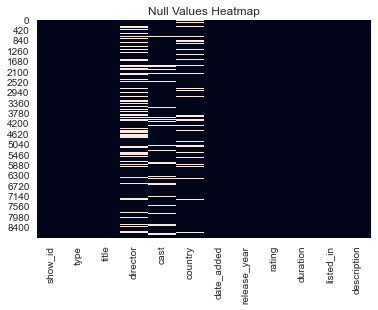

In [12]:
sns.heatmap(netflix.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [13]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
netflix['director'].fillna('No Director', inplace=True)
netflix['cast'].fillna('No Cast', inplace=True)
netflix['country'].fillna('Country Unavailable', inplace=True)
netflix.dropna(subset=['date_added','rating'],inplace=True)

In [15]:
netflix.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration         True
listed_in       False
description     False
dtype: bool

## Splitting the Dataset
Doing this because there are movies and TV shows in the dataset, so we need to separate them.

In [16]:
netflix_shows = netflix[netflix['type']=='TV Show'].copy()
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [17]:
netflix_movies = netflix[netflix['type']=='Movie'].copy()
netflix_movies.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


# Data Visualisation

### Checking the number of Movies and TV Shows by netflix
This is to see the number of movies and shows and the percentage of movies to shows.

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


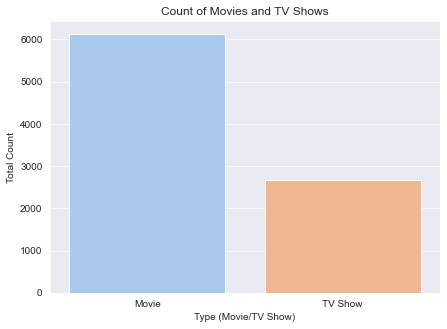

In [19]:
plt.figure(figsize=(7,5))
g = sns.countplot(netflix.type, palette="pastel");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

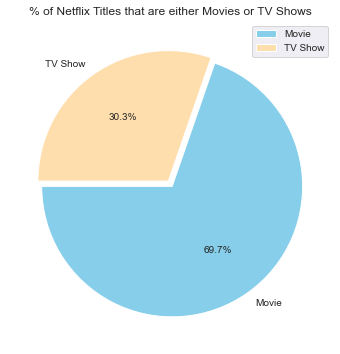

In [20]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix.type.value_counts(), explode=(0.025,0.025), labels=netflix.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

## Netflix Film Ratings
Now, we will explore the ratings which are based on the film rating system. The ordering of the ratings will be based on the age of the respective audience from youngest to oldest.

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


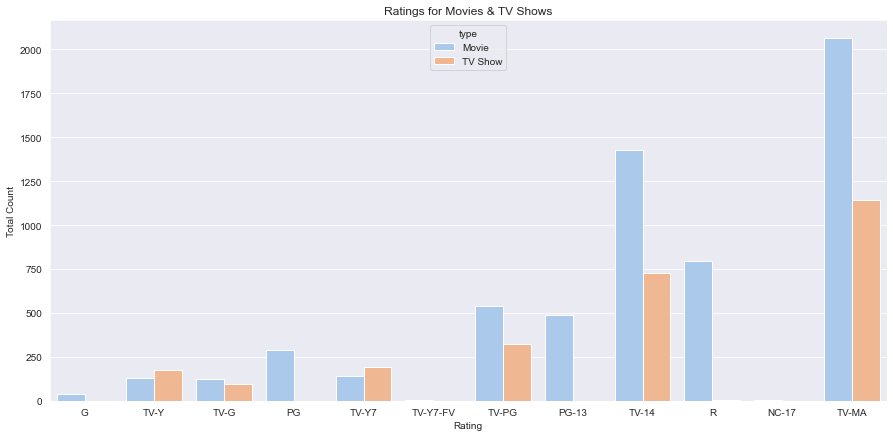

In [21]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(netflix.rating, hue=netflix.type, order=order, palette="pastel");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()


C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


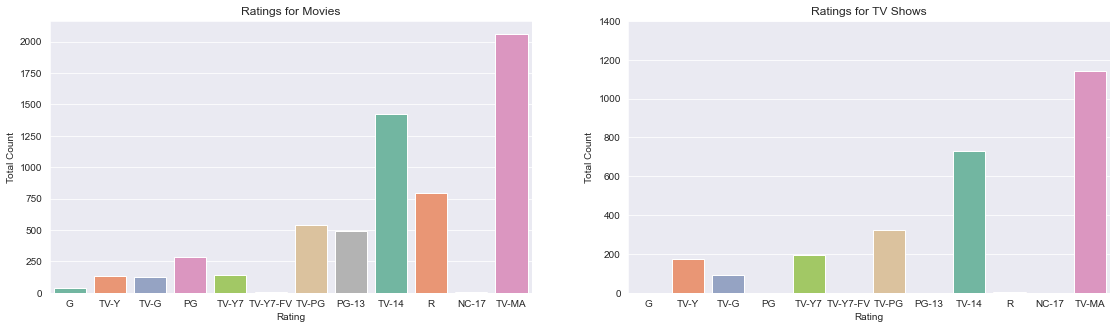

In [22]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(netflix_movies.rating, order=order,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(netflix_shows.rating, order=order,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

### Content added each year
Now we will take a look at the amount content Netflix has added throughout the previous years. 

In [23]:
netflix['year_added'] = pd.DatetimeIndex(netflix['date_added']).year
netflix_movies['year_added'] = pd.DatetimeIndex(netflix_movies['date_added']).year
netflix_shows['year_added'] = pd.DatetimeIndex(netflix_shows['date_added']).year
netflix['month_added'] = pd.DatetimeIndex(netflix['date_added']).month
netflix_movies['month_added'] = pd.DatetimeIndex(netflix_movies['date_added']).month
netflix_shows['month_added'] = pd.DatetimeIndex(netflix_shows['date_added']).month

In [24]:
netflix_year = netflix['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2022]
netflix_year

,year,count
0,2019,2016
1,2020,1879
2,2018,1648
3,2021,1498
4,2017,1186
5,2016,428
6,2015,82
7,2014,24
8,2011,13
9,2013,11


In [26]:
netflix_year2 = netflix[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2022]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2022]

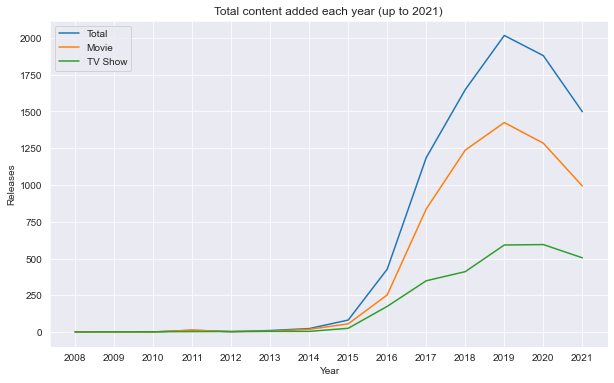

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2022, 1))
plt.title("Total content added each year (up to 2021)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Based on the above timeline, we can see that the popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been tremendous. We also see the effect the pandemic had on the streaming platform as the amount on content reduced from 2020 and it still didn't pick up in 2021.

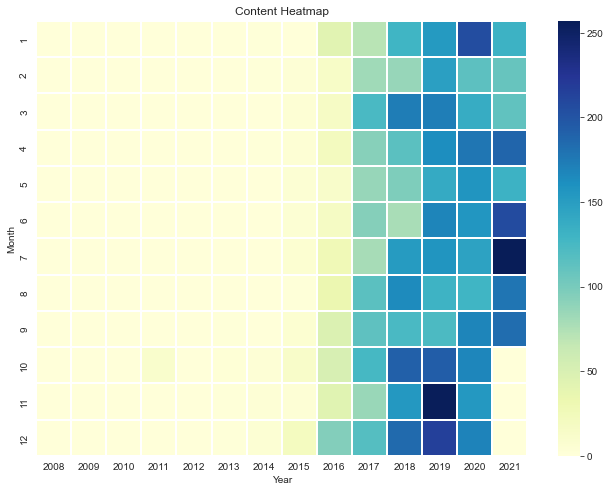

In [28]:
month_year = netflix.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

## Countries with the most content available

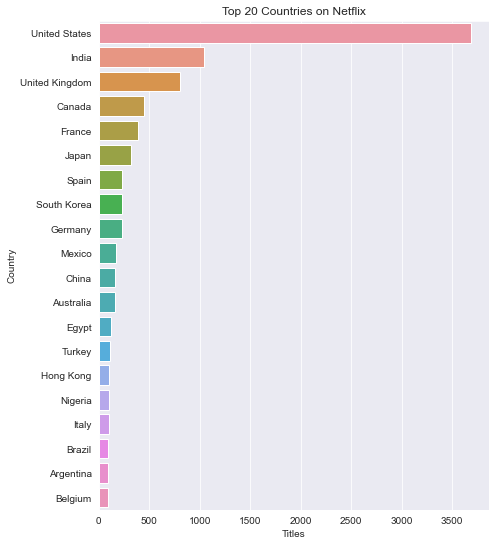

In [30]:
filtered_countries = netflix.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

Egypt and Nigeria are the only African Countires on the top 20 list. USA has the most content which isn't surprising, India second and China doesn't make an appearance.

## Popular Genres

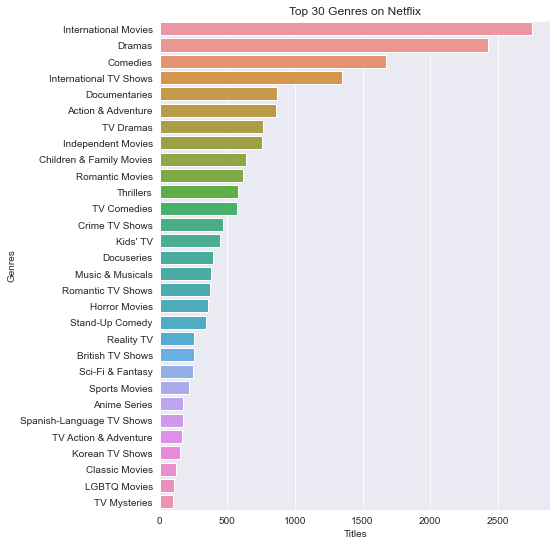

In [31]:
filtered_genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:30])
plt.title('Top 30 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

# Top Directors on Netlix

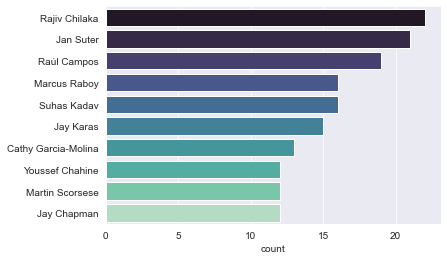

In [32]:
filtered_directors = netflix[netflix.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='mako')
plt.show()


## Top Actors on Netflix

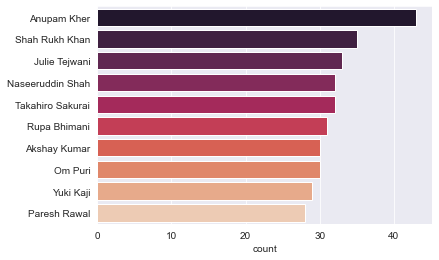

In [33]:
filtered_cast = netflix[netflix.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

International Diretors direct more Movies/shows than their American counterparts, same for the actors. This isn't surprising as we already saw that International Movies is the most popular Genre.


# The rise of international content (movies and Tv shows) on netflix

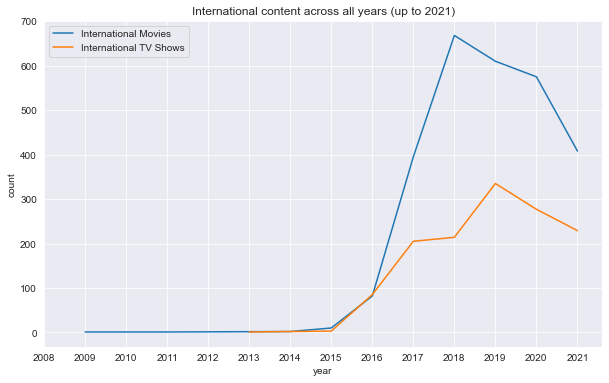

In [34]:
international_movies = netflix[netflix['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2022]

international_shows = netflix[netflix['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2022]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2022, 1))
plt.title("International content across all years (up to 2021)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

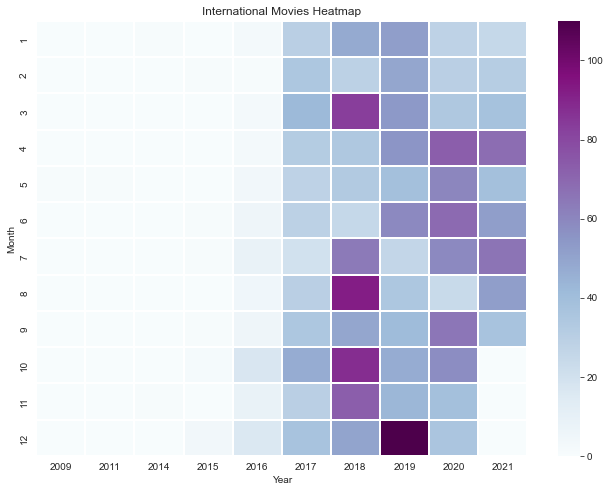

In [35]:
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intmov_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

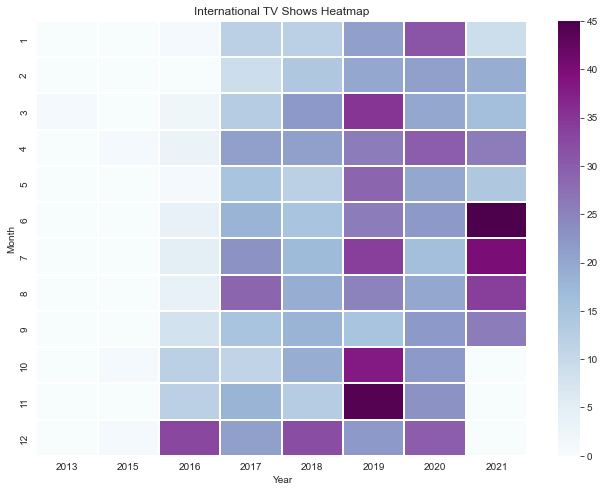

In [36]:
intsho_month_year_df = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intsho_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International TV Shows Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

# Inferences and Conclusion
It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix has been breaking into the African scene with some originals from Nigeria and Egypt for example and also older content from those countries. Netflix should grow bigger in the coming years especially in Africa, as they seem keen on the African scene.